# NOTE: Project abandoned, as there is no data correlation between religion and alcohol consumption based on the available data



question to analyze:
predict alcohol consumption based on religion

1. Inspect the datasets
2. Cleanup the data (reduce features, consolidate features, handle nans)
3. Analyze data distribution, trends, correlations
4. Build a regression model

OECD https://data.oecd.org/healthrisk/alcohol-consumption.htm
WRP https://data.world/cow/world-religion-data


In [32]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [33]:
print(glob.glob("*.csv"))

['OECD_Alcohol_Consumption_per_Capita.csv', 'WRP_national_data.csv']


In [34]:
OECD_Alcohol = pd.read_csv('OECD_Alcohol_Consumption_per_Capita.csv',encoding='utf-8')
#alcohol consumption throughout the years, throughout the countries
WRP_national = pd.read_csv('WRP_national_data.csv',encoding='utf-8')
#1995 values, religion over the years


## Inspecting datasets

### OECD_Alcohol

In [35]:
OECD_Alcohol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2751 entries, 0 to 2750
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LOCATION       2751 non-null   object 
 1   INDICATOR      2751 non-null   object 
 2   SUBJECT        2751 non-null   object 
 3   MEASURE        2751 non-null   object 
 4   FREQUENCY      2751 non-null   object 
 5   TIME           2751 non-null   int64  
 6   LITRES/CAPITA  2751 non-null   float64
 7   Flag Codes     216 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 172.1+ KB


In [36]:
OECD_Alcohol.head(20)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,LITRES/CAPITA,Flag Codes
0,AUS,ALCOHOL,TOT,LT_CAP15,A,1960,9.3,NaN
1,AUS,ALCOHOL,TOT,LT_CAP15,A,1961,9.4,NaN
2,AUS,ALCOHOL,TOT,LT_CAP15,A,1962,9.5,NaN
3,AUS,ALCOHOL,TOT,LT_CAP15,A,1963,9.8,NaN
4,AUS,ALCOHOL,TOT,LT_CAP15,A,1964,10.1,NaN
5,AUS,ALCOHOL,TOT,LT_CAP15,A,1965,10.0,NaN
6,AUS,ALCOHOL,TOT,LT_CAP15,A,1966,10.3,NaN
7,AUS,ALCOHOL,TOT,LT_CAP15,A,1967,10.8,NaN
8,AUS,ALCOHOL,TOT,LT_CAP15,A,1968,11.1,NaN
9,AUS,ALCOHOL,TOT,LT_CAP15,A,1969,11.6,NaN


In [37]:
for col in OECD_Alcohol.columns:
    if OECD_Alcohol[col].dtype == 'object':
        uniques = OECD_Alcohol[col].unique()
        print(f'''{col} unique values:
        {uniques}''')

LOCATION unique values:
        ['AUS' 'AUT' 'BEL' 'CAN' 'CZE' 'DNK' 'FIN' 'FRA' 'DEU' 'GRC' 'HUN' 'ISL'
 'IRL' 'ITA' 'JPN' 'KOR' 'LUX' 'MEX' 'NLD' 'NZL' 'NOR' 'POL' 'PRT' 'SVK'
 'ESP' 'SWE' 'CHE' 'TUR' 'GBR' 'USA' 'BRA' 'CHL' 'CHN' 'EST' 'IND' 'IDN'
 'ISR' 'RUS' 'SVN' 'ZAF' 'COL' 'LVA' 'LTU' 'CRI' 'ARG' 'BGR' 'HRV' 'PER'
 'ROU']
INDICATOR unique values:
        ['ALCOHOL']
SUBJECT unique values:
        ['TOT']
MEASURE unique values:
        ['LT_CAP15']
FREQUENCY unique values:
        ['A']
Flag Codes unique values:
        [nan 'B' 'D' 'E' 'P']


In [38]:
#removing obsolete columns


In [39]:
OECD_Alcohol.drop(columns=['INDICATOR', 'SUBJECT','MEASURE','FREQUENCY', 'Flag Codes'], inplace=True)


In [40]:
print(OECD_Alcohol.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2751 entries, 0 to 2750
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LOCATION       2751 non-null   object 
 1   TIME           2751 non-null   int64  
 2   LITRES/CAPITA  2751 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 64.6+ KB
None


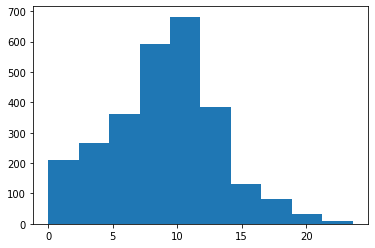

<function matplotlib.pyplot.clf()>

In [41]:
plt.hist(OECD_Alcohol['LITRES/CAPITA'])
plt.show()
plt.clf

### WRP dataset

In [42]:
WRP_national.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 84 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          1995 non-null   int64  
 1   state         1995 non-null   int64  
 2   name          1995 non-null   object 
 3   chrstprot     1995 non-null   int64  
 4   chrstcat      1995 non-null   int64  
 5   chrstorth     1995 non-null   int64  
 6   chrstang      1995 non-null   int64  
 7   chrstothr     1995 non-null   int64  
 8   chrstgen      1995 non-null   int64  
 9   judorth       1995 non-null   int64  
 10  jdcons        1995 non-null   int64  
 11  judref        1993 non-null   float64
 12  judothr       1995 non-null   int64  
 13  judgen        1995 non-null   int64  
 14  islmsun       1995 non-null   int64  
 15  islmshi       1995 non-null   int64  
 16  islmibd       1995 non-null   int64  
 17  islmnat       1995 non-null   int64  
 18  islmalw       1995 non-null 

In [43]:
WRP_national= WRP_national.sort_values('nonreligpct', ascending=False)
WRP_national.head(20)

,year,state,name,chrstprot,chrstcat,chrstorth,chrstang,chrstothr,chrstgen,judorth,...,othrgenpct,sumreligpct,total,dualrelig,datatype,sourcereliab,recreliab,reliabilevel,Version,sourcecode
1675,1990,731,PRK,10000,46000,0,0,291260,347260,0,...,0.0022,0.9978,1.0001,0,24,4,8,Medium,1.1,7
1674,1985,731,PRK,70450,32500,0,0,275890,378840,0,...,0.0000,1.0000,1.0000,0,134,9,28,Low,1.1,2
1676,1995,731,PRK,10348,44034,0,0,408527,462909,0,...,0.0083,0.9917,1.0000,0,134,9,28,Low,1.1,2
624,2010,316,CZR,174855,2077857,0,0,0,2252712,0,...,0.0279,0.9721,1.0000,0,24,4,5,High,1.1,119
1842,1980,816,DRV,537320,3404000,0,164599,1074640,5180559,0,...,0.0133,0.9867,1.0000,0,134,4,10,Medium,1.1,7
1843,1985,816,DRV,498660,3812000,0,102299,537320,4950279,0,...,0.0044,0.9956,0.9999,0,34,9,28,Low,1.1,2
1673,1980,731,PRK,130900,19000,0,0,173900,323800,0,...,0.0005,0.9995,0.9999,0,134,4,10,Medium,1.1,7
1845,1995,816,DRV,737930,5165510,0,3222,0,5906662,0,...,0.0267,0.9733,1.0000,0,3,99,35,Low,1.1,99
1844,1990,816,DRV,460000,4220000,0,2900,0,4682900,0,...,0.0172,0.9828,1.0000,0,24,4,8,Medium,1.1,7
1837,1955,816,DRV,135500,406500,0,0,135500,677500,0,...,0.0000,1.0000,1.0000,0,3,99,35,Low,1.1,99


In [44]:
columns = WRP_national.columns

columns = list(columns[62:78])
columns2 = ['year','name','chrstgenpct','judgenpct','islmgenpct']
columns2 += columns
WRP_national = WRP_national[columns2]


In [45]:
WRP_national["sumreligpct"] = np.where(WRP_national["dualrelig"] == 1, (1-WRP_national['nonreligpct']), WRP_national["sumreligpct"])
WRP_national= WRP_national.sort_values('dualrelig', ascending=False)
WRP_national.drop(columns=['dualrelig', 'total'], inplace=True)
WRP_national.head(20)

,year,name,chrstgenpct,judgenpct,islmgenpct,budgenpct,zorogenpct,hindgenpct,sikhgenpct,shntgenpct,bahgenpct,taogenpct,jaingenpct,confgenpct,syncgenpct,anmgenpct,nonreligpct,othrgenpct,sumreligpct
1759,2000,MYA,0.0704,0.0000,0.0400,0.7654,0.0,0.0010,0.0000,0.0000,0.0012,0.0000,0.0001,0.0020,0.0022,0.1133,0.0027,0.0017,0.9973
1030,2010,SIE,0.1905,0.0000,0.5532,0.0000,0.0,0.0005,0.0000,0.0000,0.0007,0.0000,0.0000,0.0000,0.0000,0.2374,0.0122,0.0054,0.9878
60,1995,HAI,0.9222,0.0000,0.0001,0.0000,0.0,0.0000,0.0000,0.0000,0.0006,0.0000,0.0000,0.0000,0.5000,0.0000,0.0000,0.0000,1.0000
1706,2010,JPN,0.0196,0.0000,0.0015,0.6907,0.0,0.0002,0.0000,0.8474,0.0001,0.0000,0.0000,0.0009,0.0023,0.0001,0.0950,0.0000,0.9050
1751,1960,MYA,0.0604,0.0000,0.0344,0.7500,0.0,0.0335,0.0003,0.0000,0.0003,0.0000,0.0000,0.0000,0.0030,0.1154,0.0022,0.0004,0.9978
47,2000,CUB,0.7232,0.0000,0.0008,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.7000,0.0000,0.1500,0.0000,0.8500
58,1985,HAI,0.8738,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5000,0.0000,0.0887,0.0000,0.9113
1697,1965,JPN,0.0300,0.0000,0.0000,0.7000,0.0,0.0000,0.0000,0.7655,0.0001,0.0000,0.0000,0.0000,0.0003,0.0000,0.0881,0.0000,0.9119
1029,2005,SIE,0.1920,0.0000,0.5717,0.0000,0.0,0.0005,0.0000,0.0000,0.0007,0.0000,0.0000,0.0000,0.0000,0.2155,0.0139,0.0057,0.9861
1757,1990,MYA,0.0602,0.0000,0.0261,0.7750,0.0,0.0160,0.0002,0.0000,0.0013,0.0000,0.0001,0.0145,0.0029,0.0996,0.0039,0.0003,0.9961


In [46]:
WRP_national.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1995 entries, 1759 to 317
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         1995 non-null   int64  
 1   name         1995 non-null   object 
 2   chrstgenpct  1995 non-null   float64
 3   judgenpct    1995 non-null   float64
 4   islmgenpct   1995 non-null   float64
 5   budgenpct    1995 non-null   float64
 6   zorogenpct   1995 non-null   float64
 7   hindgenpct   1995 non-null   float64
 8   sikhgenpct   1995 non-null   float64
 9   shntgenpct   1995 non-null   float64
 10  bahgenpct    1995 non-null   float64
 11  taogenpct    1995 non-null   float64
 12  jaingenpct   1995 non-null   float64
 13  confgenpct   1995 non-null   float64
 14  syncgenpct   1995 non-null   float64
 15  anmgenpct    1995 non-null   float64
 16  nonreligpct  1995 non-null   float64
 17  othrgenpct   1995 non-null   float64
 18  sumreligpct  1995 non-null   float64
dtypes: f

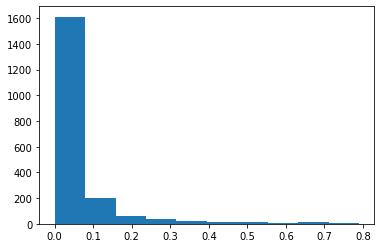

<function matplotlib.pyplot.clf()>

In [47]:
plt.hist(WRP_national.nonreligpct)
plt.show()
plt.clf

### Combining the datasets

In [48]:
OECD_countries = OECD_Alcohol.LOCATION.unique()
WRP_countries = WRP_national.name.unique()
common_countries = [i for i in OECD_countries if i in WRP_countries]
print(common_countries)

['AUS', 'BEL', 'CAN', 'CZE', 'FIN', 'GRC', 'HUN', 'ITA', 'JPN', 'LUX', 'MEX', 'NOR', 'POL', 'TUR', 'USA', 'BRA', 'CHL', 'CHN', 'EST', 'IND', 'ISR', 'RUS', 'COL', 'ARG', 'PER']


In [49]:
all_data = pd.merge(
    left = OECD_Alcohol,
    right = WRP_national,
    left_on = ['LOCATION', 'TIME'],
    right_on = ['name', 'year'],
    how='inner')

print(all_data.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 0 to 237
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LOCATION       238 non-null    object 
 1   TIME           238 non-null    int64  
 2   LITRES/CAPITA  238 non-null    float64
 3   year           238 non-null    int64  
 4   name           238 non-null    object 
 5   chrstgenpct    238 non-null    float64
 6   judgenpct      238 non-null    float64
 7   islmgenpct     238 non-null    float64
 8   budgenpct      238 non-null    float64
 9   zorogenpct     238 non-null    float64
 10  hindgenpct     238 non-null    float64
 11  sikhgenpct     238 non-null    float64
 12  shntgenpct     238 non-null    float64
 13  bahgenpct      238 non-null    float64
 14  taogenpct      238 non-null    float64
 15  jaingenpct     238 non-null    float64
 16  confgenpct     238 non-null    float64
 17  syncgenpct     238 non-null    float64
 18  anmgenpct 

In [50]:
all_data.drop(columns=['name', 'TIME'], inplace=True)
all_data.head(20)

,LOCATION,LITRES/CAPITA,year,chrstgenpct,judgenpct,islmgenpct,budgenpct,zorogenpct,hindgenpct,sikhgenpct,shntgenpct,bahgenpct,taogenpct,jaingenpct,confgenpct,syncgenpct,anmgenpct,nonreligpct,othrgenpct,sumreligpct
0,AUS,9.3,1960,0.9554,0.0015,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0377,0.0053,0.9947
1,AUS,10.0,1965,0.9500,0.0014,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0400,0.0086,0.9914
2,AUS,11.6,1970,0.9547,0.0013,0.0024,0.0001,0.0,0.0000,0.0000,0.0,0.0003,0.0,0.0,0.0000,0.0000,0.0000,0.0409,0.0003,0.9997
3,AUS,12.9,1975,0.9457,0.0013,0.0039,0.0001,0.0,0.0000,0.0000,0.0,0.0003,0.0,0.0,0.0000,0.0000,0.0000,0.0470,0.0018,0.9982
4,AUS,12.7,1980,0.9029,0.0009,0.0102,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0598,0.0262,0.9738
5,AUS,11.8,1985,0.9274,0.0012,0.0122,0.0002,0.0,0.0000,0.0000,0.0,0.0003,0.0,0.0,0.0000,0.0000,0.0000,0.0585,0.0003,0.9997
6,AUS,10.6,1990,0.8324,0.0009,0.0204,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0862,0.0601,0.9399
7,AUS,9.8,1995,0.8695,0.0011,0.0301,0.0007,0.0,0.0005,0.0001,0.0,0.0003,0.0,0.0,0.0001,0.0002,0.0000,0.0870,0.0104,0.9896
8,AUS,10.2,2000,0.7850,0.0010,0.0422,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.1199,0.0518,0.9482
9,AUS,10.5,2005,0.7634,0.0010,0.0452,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.1384,0.0519,0.9481


## MODELING

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

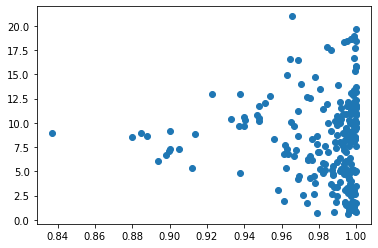

In [52]:
x = all_data['sumreligpct']
y = all_data['LITRES/CAPITA']
scaler = StandardScaler()

x_reshaped = np.array(x).reshape(-1,1)
x_scaled = scaler.fit_transform(x_reshaped)
y_reshaped = np.array(y).reshape(-1,1)
y_scaled = scaler.fit_transform(y_reshaped)

plt.scatter(x,y)
plt.show()
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size = .10, random_state= 0)


In [53]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)
ypred =  lr_model.predict(x_test)

print('train score:')
print(lr_model.score(x_train, y_train))
print('test score:')
print(lr_model.score(x_test, y_test))

train score:
0.00238696082404799
test score:
-0.056757108460967265


Project abandoned, as there is no data correlation between religion and alcohol consumption based on the available data